In [19]:
import pandas as pd
data=pd.read_csv('201901-202003 (1).csv')
data.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
data.head(2)

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8


In [20]:
del data['고객거주_시군구']
del data['카드이용_시군구']
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8


In [21]:
data['연령대'] = data['연령대'].str.rstrip('s').astype('int')
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8


In [22]:
data['년'] = data['연월'].astype(str).str[0:4]

In [23]:
data['월'] = data['연월'].astype(str).str[4:6]

In [24]:
import numpy as np
data['계절'] = np.nan

data['계절'][data['월'] == 1]='겨울'
data['계절'][data['월'] == 2]='겨울'
data['계절'][data['월'] == 3]='봄'
data['계절'][data['월'] == 4]='봄'
data['계절'][data['월'] == 5]='봄'
data['계절'][data['월'] == 6]='여름'
data['계절'][data['월'] == 7]='여름'
data['계절'][data['월'] == 8]='여름'
data['계절'][data['월'] == 9]='가을'
data['계절'][data['월'] == 10]='가을'
data['계절'][data['월'] == 11]='가을'
data['계절'][data['월'] == 12]='겨울'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value i

In [25]:
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,01,NaN
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,01,NaN


### 코로나 2020 월별 확진자 수 

In [12]:
data2 = {'2월':'2031','3월':'6855',"4월":'979',"5월":'703',"6월":'1331',"7월":'1506',"8월":'5642',"9월":'3865',"10월":'2699'}
#covid19_vis = pd.DataFrame(data)
type(data2)

dict

In [13]:
print(data2)

{'2월': '2031', '3월': '6855', '4월': '979', '5월': '703', '6월': '1331', '7월': '1506', '8월': '5642', '9월': '3865', '10월': '2699'}


In [14]:
data2

{'2월': '2031',
 '3월': '6855',
 '4월': '979',
 '5월': '703',
 '6월': '1331',
 '7월': '1506',
 '8월': '5642',
 '9월': '3865',
 '10월': '2699'}

In [15]:
data2 = pd.DataFrame({'월별':['2월','3월','4월','5월','6월','7월','8월','9월','10월'],
                                "확진자수":[2031,6855,979,703,1331,1506,5642,3865,2699]})

In [16]:
data2

,월별,확진자수
0,2월,2031
1,3월,6855
2,4월,979
3,5월,703
4,6월,1331
5,7월,1506
6,8월,5642
7,9월,3865
8,10월,2699


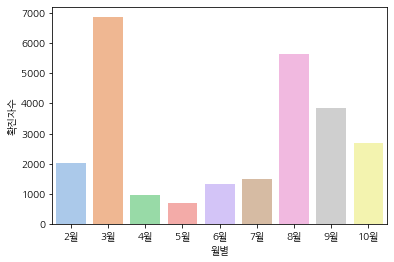

In [18]:
import matplotlib as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_palette("pastel")
sns.barplot(x= data2['월별'], y=data2['확진자수'])

### 2020 이용고객수, 이용건수, 이용금액 Modeling 

X = 이용고객수, 이용건수<br>
y = 이용 금액

In [34]:
df = data[data['년'] == '2020']
df

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
20425415,202001,강원,건강보조식품 소매업,강원,20,2,1,3,345000,3,2020,01,NaN
20425416,202001,강원,건강보조식품 소매업,강원,30,1,2,3,1903450,3,2020,01,NaN
20425417,202001,강원,건강보조식품 소매업,강원,30,2,2,14,1520500,15,2020,01,NaN
20425418,202001,강원,건강보조식품 소매업,강원,40,1,3,9,1239200,9,2020,01,NaN
20425419,202001,강원,건강보조식품 소매업,강원,40,1,4,3,606700,4,2020,01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,충북,30,1,2,3,43300,4,2020,03,NaN
24697788,202003,충북,휴양콘도 운영업,충북,40,1,3,3,35000,3,2020,03,NaN
24697789,202003,충북,휴양콘도 운영업,충북,50,1,4,4,188000,6,2020,03,NaN
24697790,202003,충북,휴양콘도 운영업,충북,50,2,4,4,99000,6,2020,03,NaN


In [41]:
df_0102 = df[(df['월']== '01') | (df['월']== '02')]
df_0102 = df_0102[['이용고객수','이용금액','이용건수']]
df_0102

,이용고객수,이용금액,이용건수
20425415,3,345000,3
20425416,3,1903450,3
20425417,14,1520500,15
20425418,9,1239200,9
20425419,3,606700,4
...,...,...,...
23437279,3,62000,3
23437280,3,172000,4
23437281,12,399000,12
23437282,13,504100,16


In [42]:
df_03 = df[df['월']=='03']
df_03 = df_03[['이용고객수', '이용금액','이용건수']]
df_03

,이용고객수,이용금액,이용건수
23437284,6,2529000,6
23437285,10,1133650,9
23437286,3,570800,3
23437287,25,4192828,25
23437288,21,3358900,24
...,...,...,...
24697787,3,43300,4
24697788,3,35000,3
24697789,4,188000,6
24697790,4,99000,6


In [46]:
X_train = df_0102[['이용고객수','이용건수']]
y_train = df_0102[['이용금액']]
X_test = df_03[['이용고객수','이용건수']]
y_test = df_03[['이용금액']]

In [48]:
print("Shape of X_train :" ,X_train.shape)
print("Shape of y_train :" ,y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (3011869, 2)
Shape of y_train : (3011869, 1)
Shape of X_test : (1260508, 2)
Shape of y_test : (1260508, 1)


train 이랑 test랑 3:1 정도 차이나길래 그냥 썼음

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

model = LinearRegression()
model = model.fit(X_train, y_train)

y_new = model.predict(X_test)
print(model.intercept_, model.coef_)

[-288813.75827291] [[52102.30963744 -3589.85514809]]


In [59]:
y_new

array([[   2260.96866318],
       [ 199900.64176867],
       [-143276.39480487],
       ...,
       [-101943.6506117 ],
       [-101943.6506117 ],
       [-143276.39480487]])

In [62]:
y_new = y_new.astype(np.int)

In [69]:
MSE = np.square(np.subtract(y_test,y_new)).mean()

In [72]:
MSE # 34.87537

이용금액    8.047500e+13
dtype: float64

In [68]:
display(y_new[:10],y_test[:10])

array([[   2260],
       [ 199900],
       [-143276],
       [ 923997],
       [ 719178],
       [-143276],
       [1118047],
       [-143276],
       [ 140618],
       [ -94763]])

,이용금액
23437284,2529000
23437285,1133650
23437286,570800
23437287,4192828
23437288,3358900
23437289,417000
23437290,2539700
23437291,39000
23437292,1183400
23437293,493400


In [73]:
# 결정 계수 = 1이랑 가까울 수록 좋은거임
model.score(X_test, y_test)

0.7638997543599337